# Lead Scoring

**Problem: Lead Scoring Model**

Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads would not turn into actual bookings. So there is a need for a system that priorities the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on.  
Here you have a dataset of leads with their set of features and their status. You have to build a ML model that predicts the lead score as an OUTPUT on the basis of the INPUT set of features. This lead score will range from 0-100, so more the lead score means more chances of conversion of lead to WON.

**Note:**
1. The leads with STATUS other than `WON` or `LOST` can be dropped during training.
2. Treat all columns as CATEGORICAL columns
3. `9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0` represents `NaN` and could be present in more than one column.

**Dataset Link:** https://docs.google.com/spreadsheets/d/1rK1CLqpsd6JfSBLk9nRE-f0NzDc9lEXgxZ-cKjxIN_s/edit?usp=sharing

## Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Loading the dataset:

In [2]:
raw_df=pd.read_csv('Filter_Copy_of_Data_Science_Internship - Dump.csv', index_col=0)
raw_df

,status,lost_reason,budget,lease,movein,room_type
0,LOST,Not responding,NaN,NaN,NaN,NaN
1,LOST,Low budget,NaN,NaN,NaN,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,Ensuite
3,LOST,Low budget,0-0,0,NaN,NaN
4,LOST,Junk lead,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
46603,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,Studio
46604,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,Studio
46605,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,Studio
46606,LOST,Low availability,1108,294,30/08/22,NaN


## Exploring the dataset:

In [3]:
raw_df.shape

(46608, 6)

In [4]:
raw_df.count()

status         46608
lost_reason    43244
budget         42908
lease          44267
movein         32970
room_type      23061
dtype: int64

In [5]:
raw_df.isnull().sum()

status             0
lost_reason     3364
budget          3700
lease           2341
movein         13638
room_type      23547
dtype: int64

# Step 1: Data Cleaning

## Selecting the required columns:

In [6]:
df = raw_df.drop('movein',axis=1)
df.tail(5)

,status,lost_reason,budget,lease,room_type
46603,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,Studio
46604,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,Studio
46605,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,Studio
46606,LOST,Low availability,1108,294,NaN
46607,LOST,Low availability,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,Studio


##  Let's Handel the `status` column:

In [7]:
# Drop leads with status other than 'WON' or 'LOST'
df = df[df['status'].isin(['WON', 'LOST'])]
df.head(5)

,status,lost_reason,budget,lease,room_type
0,LOST,Not responding,NaN,NaN,NaN
1,LOST,Low budget,NaN,NaN,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Ensuite
3,LOST,Low budget,0-0,0,NaN
4,LOST,Junk lead,NaN,NaN,NaN


## Let's Handel the `lost_reason` column:

In [8]:
# Fill NaN values in lost_reason column with "Not Applicable" where status is "WON"
df.loc[df["status"]== "WON", "lost_reason"] = df.loc[df["status"] == "WON", "lost_reason"].fillna("Not_Applicable")

In [9]:
df.lost_reason.value_counts()

Low availability                  8892
Not responding                    7827
Not interested                    6449
Low budget                        5505
Not_Applicable                    3073
Wants private accommodation       2781
Short stay                        2264
Not a student                     1518
Just Enquiring                    1263
Inadequate details                 827
Semester stay                      817
Booked with manager                676
Junk lead                          629
Booked on campus accommodation     613
Supply issue                       538
No supply                          534
Not serving in that region         411
Repeat lead                        394
Booked with competitor             356
Not going to university            329
Distance issue                     219
Junk lead/ Just Enquiring          147
Lead issue                         127
Looking for admission               41
Didn't respond in time              35
Visa/admission denied    

In [10]:
# Remove rows with very low sample for lost reasons
top_reasons = ['Low availability', 'Not responding', 'Not interested', 'Low budget','Not_Applicable', 'Wants private accommodation',
               'Short stay', 'Not a student', 'Just Enquiring', 'Inadequate details', 'Semester stay','Booked with manager','Junk lead']
df = df[df['lost_reason'].isin(top_reasons)]

## Let's Handel the `budget` column:

In [11]:
# Convert budget column to numerical format
df['budget'] = df['budget'].str.replace('£', '').str.extract('(\d+)')
df['budget'] = pd.to_numeric(df['budget'])

In [12]:
df.budget.isnull().sum()

3342

In [13]:
df.budget.describe()

count    39179.000000
mean       119.059828
std        127.903578
min          0.000000
25%         60.000000
50%        121.000000
75%        150.000000
max       7000.000000
Name: budget, dtype: float64

In [14]:
median_budget=df.budget.median()
df['budget'] = df['budget'].fillna(median_budget)


## Let's Handel the `lease` column:

In [15]:
# Convert lease column to numerical format
df['lease'] = df['lease'].str.extract('(\d+)')
df['lease'] = pd.to_numeric(df['lease'])

In [16]:
most_common_lease = df['lease'].mode()[0]
most_common_lease

40.0

In [17]:
df['lease'] = df['lease'].fillna(most_common_lease)


In [18]:
df

,status,lost_reason,budget,lease,room_type
0,LOST,Not responding,121.0,40.0,NaN
1,LOST,Low budget,121.0,40.0,NaN
2,LOST,Not responding,121.0,40.0,Ensuite
3,LOST,Low budget,0.0,0.0,NaN
4,LOST,Junk lead,121.0,40.0,NaN
...,...,...,...,...,...
46603,LOST,Low availability,60.0,50.0,Studio
46604,LOST,Semester stay,60.0,8.0,Studio
46605,LOST,Low availability,241.0,40.0,Studio
46606,LOST,Low availability,1108.0,294.0,NaN


## Let's Handel the `room_type` column

In [19]:
df.room_type.value_counts()

Ensuite         11372
Studio           5842
Entire Place     3884
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [20]:
top_room_type=['Ensuite', 'Studio', 'Entire Place']
df=df[df['room_type'].isin(top_room_type)]

## Let's see the missing values:

In [21]:
df.isnull().sum()

status         0
lost_reason    0
budget         0
lease          0
room_type      0
dtype: int64

## Let's see the clean `df`:

In [22]:
df.head(5)

,status,lost_reason,budget,lease,room_type
2,LOST,Not responding,121.0,40.0,Ensuite
7,LOST,Wants private accommodation,181.0,51.0,Entire Place
11,LOST,Not responding,121.0,40.0,Ensuite
12,LOST,Wants private accommodation,121.0,40.0,Entire Place
13,LOST,Not responding,181.0,50.0,Entire Place


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21098 entries, 2 to 46607
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   status       21098 non-null  object 
 1   lost_reason  21098 non-null  object 
 2   budget       21098 non-null  float64
 3   lease        21098 non-null  float64
 4   room_type    21098 non-null  object 
dtypes: float64(2), object(3)
memory usage: 989.0+ KB


## Label Encoding:

In [24]:
# Encode categorical columns
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df['lost_reason'] = le.fit_transform(df['lost_reason'])
df['room_type'] = le.fit_transform(df['room_type'])

/tmp/ipykernel_353/835178600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = le.fit_transform(df['status'])
/tmp/ipykernel_353/835178600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lost_reason'] = le.fit_transform(df['lost_reason'])
/tmp/ipykernel_353/835178600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [25]:
df.head(5)

,status,lost_reason,budget,lease,room_type
2,0,8,121.0,40.0,0
7,0,12,181.0,51.0,1
11,0,8,121.0,40.0,0
12,0,12,121.0,40.0,1
13,0,8,181.0,50.0,1


In [26]:
df.describe()

,status,lost_reason,budget,lease,room_type
count,21098.000000,21098.000000,21098.000000,21098.000000,21098.000000
mean,0.069248,6.887477,113.090151,37.552232,0.737890
std,0.253882,2.763436,66.799270,12.954270,0.864431
min,0.000000,0.000000,5.000000,0.000000,0.000000
25%,0.000000,5.000000,60.000000,40.000000,0.000000
50%,0.000000,7.000000,121.000000,40.000000,0.000000
75%,0.000000,8.000000,121.000000,50.000000,2.000000
max,1.000000,12.000000,1500.000000,144.000000,2.000000


## Data Visualization:

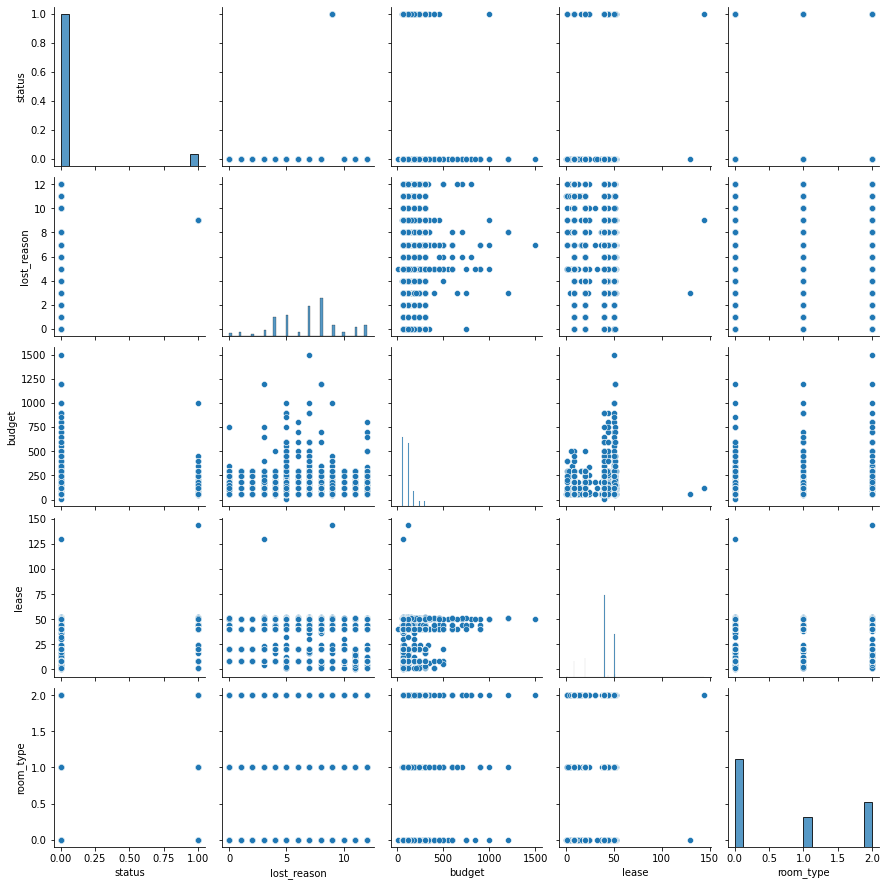

In [27]:
sns.pairplot(df)

##  Let's see the `Correlation Matrix`:

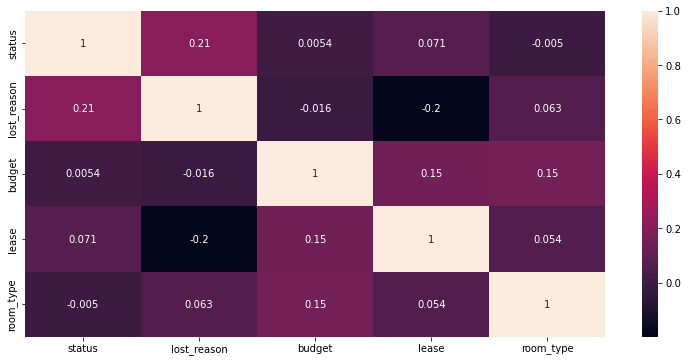

In [28]:
# Let's see the corelation matrix:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True);

# Step 2: Data splitting into Test (20%) & Train(80%) 

## Train_Test split:

In [29]:
# Select relevant features and split into train and test sets
X = df[['status', 'lost_reason', 'budget', 'lease', 'room_type']]
y = df['status']
train_size = 0.8
train_samples = int(len(X) * train_size)
X_train, X_test = X[:train_samples], X[train_samples:]
y_train, y_test = y[:train_samples], y[train_samples:]

## Training with `Logistic Regression` model:

In [30]:
# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

# Step 3: Testing the model on `test_data`

## Let's predict with the trained model:

In [31]:
# Make predictions on the test set 
y_pred = lr.predict(X_test)

## Now let's Map the predicted probability with scores:

In [32]:
# Map predicted probabilities to scores between 0-100
probabilities = lr.predict_proba(X_test)[:, 1]
scores = (probabilities * 100).round()

In [33]:
probabilities

array([0.00272596, 0.0005946 , 0.00028844, ..., 0.00073581, 0.00019186,
       0.00019468])

In [34]:
scores

array([0., 0., 0., ..., 0., 0., 0.])

# Step 4: Evaluate the performance using metrics such as `accuracy`, `precision`, `recall` and `F1-score`

## Let's see the performance:

In [35]:
# calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)

# Print performance metrics and example scores
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Example scores: {}".format(scores[-15:]))


Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
Example scores: [ 0. 99.  0.  0.  0. 99.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## Conclusion:
* We can see our model is predicting to the actual scores.
* Here we have tested the model. 
* Once we satisfied with the model then we can deploy this model using Flask on web platforms (like- AWS, Heroku, Render, etc.)
* Note that the WIN dataset is comparatively lesser then the LOSS dataset.
* So, we can collect more data to get the best result.
* Also, we can collect some more information about the customers (like- location, Income, and platforms, etc.) to make our model more dynamic.

## About Me:
**Name:** Hariom  
**Email:** sonihariom555@gmail.com  
**Contact No.:** 9956661272  
**Portfolio:**[portfolio.sonihariom.me](https://portfolio.sonihariom.me/about) 

```
Thank You!
```

In [37]:
import jovian 
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sonihariom555/lead-scoring" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/sonihariom555/lead-scoring


'https://jovian.com/sonihariom555/lead-scoring'